# Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
df = pd.read_csv(r'/Users/aaronreese/Desktop/Boat Data Project/2. Data/Prepared Data/boat_data_final.csv')

In [3]:
df.head()

,GBP Price,USD Price,Manufacturer,Condition,Fuel,Year Built,Length (Meters),Width (Meters),Material,Country Sold In,Number of views last 7 days
0,2969.93,3712.41,Rigiflex power boats,NEW,NaN,2017.0,4.00,1.90,NaN,Switzerland,226
1,2966.50,3708.13,Terhi power boats,NEW,NaN,2020.0,4.00,1.50,Thermoplastic,Germany,75
2,3355.30,4194.13,Marine power boats,NEW,NaN,NaN,3.69,1.42,Aluminium,Switzerland,124
3,2849.00,3561.25,Pioner power boats,NEW,NaN,2020.0,3.00,1.00,NaN,Denmark,64
4,2889.15,3611.44,Linder power boats,NEW,NaN,2019.0,3.55,1.46,Aluminium,Germany,58


In [4]:
df['Length (Meters)'].fillna(df['Length (Meters)'].median(), inplace=True)
df['Width (Meters)'].fillna(df['Width (Meters)'].median(), inplace=True)

# Drop Non-Numerical Columns

In [5]:
df.drop(['Manufacturer','Condition','Fuel','Year Built','Material','Country Sold In'], axis=1, inplace = True)

In [6]:
df.head()

,GBP Price,USD Price,Length (Meters),Width (Meters),Number of views last 7 days
0,2969.93,3712.41,4.00,1.90,226
1,2966.50,3708.13,4.00,1.50,75
2,3355.30,4194.13,3.69,1.42,124
3,2849.00,3561.25,3.00,1.00,64
4,2889.15,3611.44,3.55,1.46,58


# Elbow Technique

In [7]:
num_cl = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [8]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

/Users/aaronreese/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/aaronreese/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/aaronreese/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/aaronreese/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


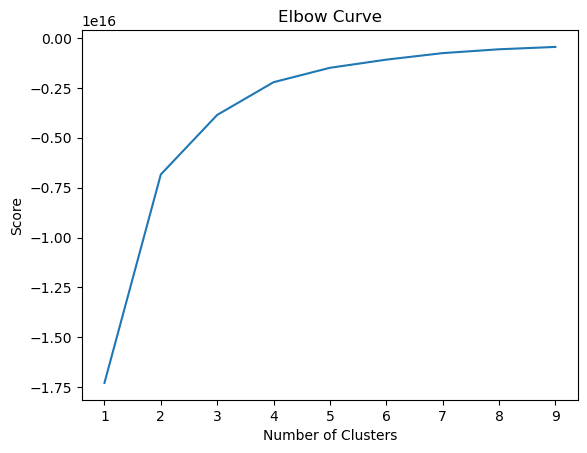

In [9]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# Question 4

In [10]:
# I will use 4 clusters based on the elbow curve.
# I chose 4 because thats where the curve still rises but tapers off as the line moves to the right.

# K-means Algorithm

In [11]:
kmeans = KMeans(n_clusters = 4)

In [12]:
kmeans.fit(df)

/Users/aaronreese/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

# New Clusters Column

In [13]:
df['clusters'] = kmeans.fit_predict(df)

/Users/aaronreese/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
df.head()

,GBP Price,USD Price,Length (Meters),Width (Meters),Number of views last 7 days,clusters
0,2969.93,3712.41,4.00,1.90,226,0
1,2966.50,3708.13,4.00,1.50,75,0
2,3355.30,4194.13,3.69,1.42,124,0
3,2849.00,3561.25,3.00,1.00,64,0
4,2889.15,3611.44,3.55,1.46,58,0


In [15]:
df['clusters'].value_counts()

0    9413
2     400
1      65
3      10
Name: clusters, dtype: int64

# Visualizations

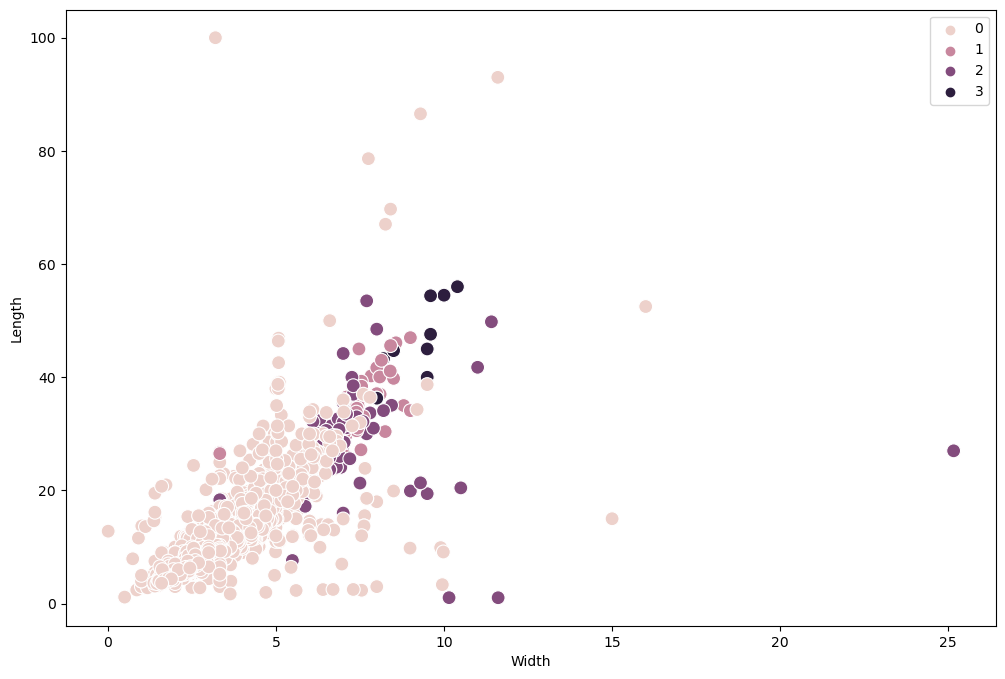

In [16]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Width (Meters)'], y=df['Length (Meters)'], hue=kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('Width')
plt.ylabel('Length') 
plt.show()

In [19]:
plt.savefig((r'/Users/aaronreese/Desktop/Boat Data Project/4. Analysis/Visualizations/length_price.jpeg'))

<Figure size 640x480 with 0 Axes>

In [70]:
# This scatterplot makes sense as it's expected for a boats width to increase with itds length.

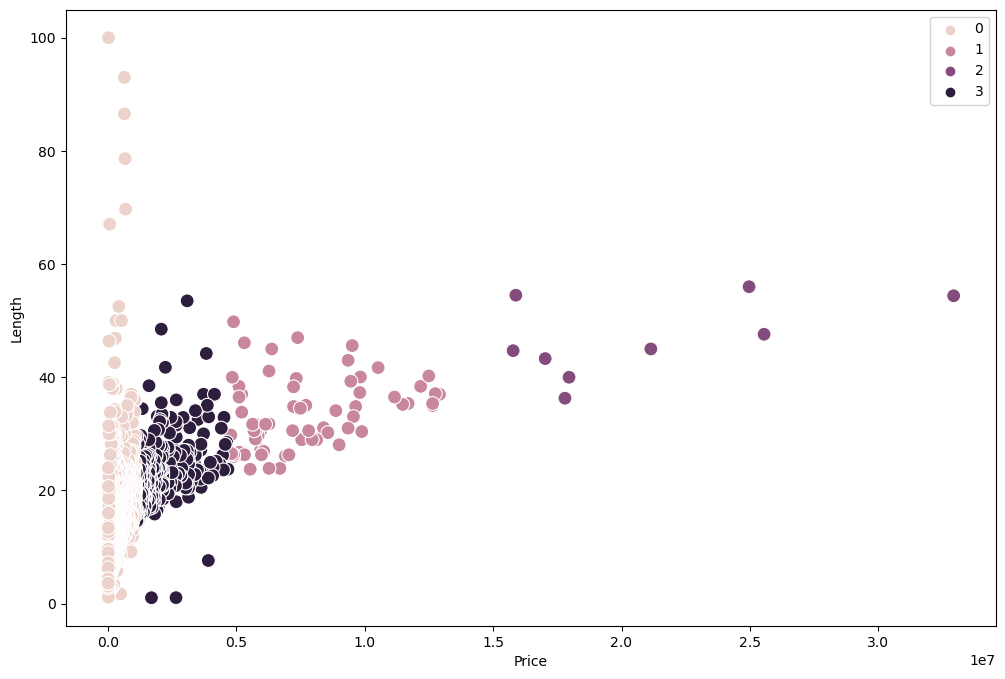

In [71]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['USD Price'], y=df['Length (Meters)'], hue=kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('Price')
plt.ylabel('Length') 
plt.show()

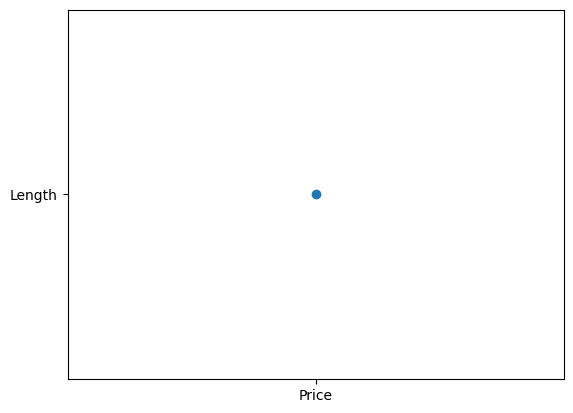

In [25]:
import openpyxl
import matplotlib.pyplot as plt

fig = plt.figure()
#plotting Graph
plt.scatter('Price','Length')
fig.savefig('temp.png', dpi=fig.dpi)

#Saving Graph in the excel Sheet
wb = openpyxl.Workbook()
ws = wb.worksheets[0]
img = openpyxl.drawing.image.Image('temp.png')
img.anchor = 'A1'
ws.add_image(img)
wb.save('out.xlsx')

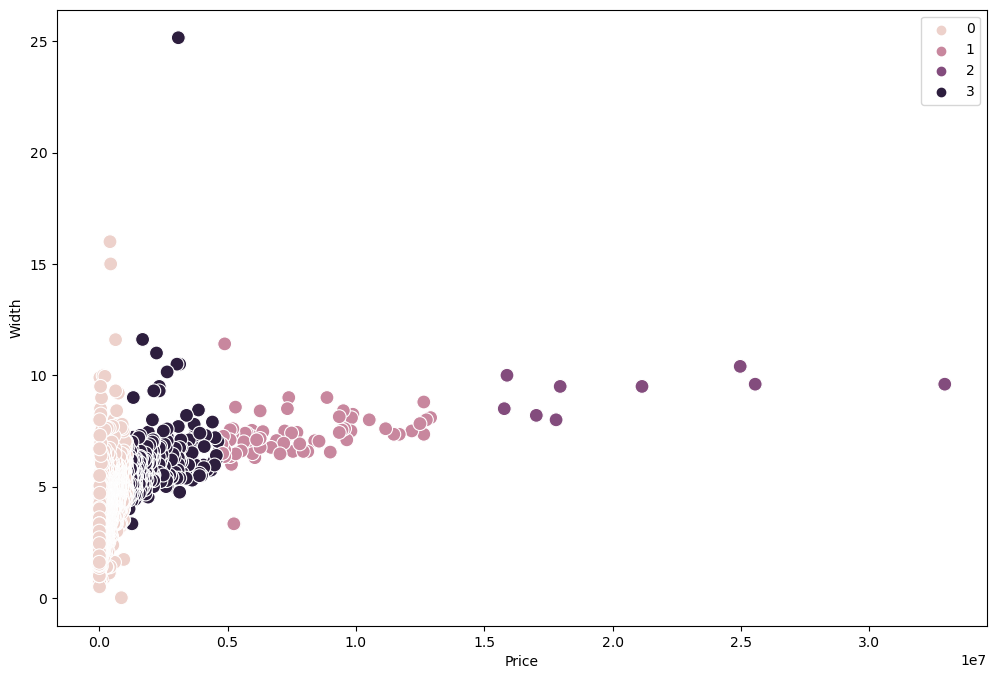

In [72]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['USD Price'], y=df['Width (Meters)'], hue=kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('Price')
plt.ylabel('Width') 
plt.show()

In [73]:
# Both of these scatterplots make sense as it's expected that if the general size of the boat increases, so does it's price.

# Descriptive Statistcs

In [74]:
df.groupby('clusters').agg({'GBP Price':['mean','median'],
                           'USD Price':['mean','median'],
                           'Length (Meters)':['mean','median'],
                           'Width (Meters)':['mean','median'],
                           'Number of views last 7 days':['mean','median'],})

GBP Price                  USD Price                \
                  mean       median          mean        median   
clusters                                                          
0         1.386671e+05     72740.25  1.733338e+05  9.092532e+04   
1         6.024400e+06   5635153.00  7.530500e+06  7.043941e+06   
2         1.654738e+07  14301250.00  2.068422e+07  1.787656e+07   
3         1.597444e+06   1366800.00  1.996805e+06  1.708500e+06   

         Length (Meters)        Width (Meters)         \
                    mean median           mean median   
clusters                                                
0              10.879048   9.99       3.383883   3.25   
1              33.298310  31.70       7.259859   7.26   
2              45.810000  44.85       9.130000   9.50   
3              22.809658  22.26       5.838289   5.60   

         Number of views last 7 days         
                                mean median  
clusters                                     
0                         150.513726  108.0  
1                         182.394366  132.0  
2                         296.400000  207.0  
3                         108.704156   89.0

In [1]:
# These results could be useful because they show where the middlemost values are for all clusters giving a genral understanding of the size of the data.